In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [3]:
Concrete_Strength = pd.read_excel("../Data/PreparedConcreteData.xls") 

In [4]:
C = Concrete_Strength
C.head()

,Cement,Slag,FlyAsh,Water,Superplast,Coarse_agg,Fine_agg,Age,CCS,Contains_Slag,Contains_FlyAsh,Contains_Superplast,CuredConcrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0,0,1,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0,0,1,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,1,0,0,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,1,0,0,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,1,0,0,1


## Now we can go a different path and see if we can predict whether concrete is cured_concrete or otherwise fresh concrete using Concrete Compressive Strength ('CCS'). 

## Let's begin by displaying the relationship between CCS and cured_concrete:

In [5]:
# Fit a linear regression model (name the model "linreg").
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

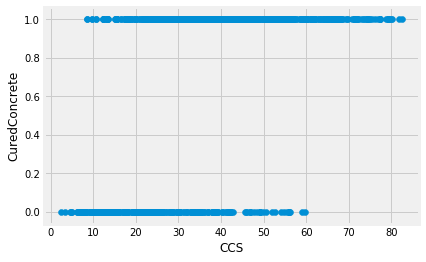

In [6]:
plt.scatter(C.CCS, C.CuredConcrete)
plt.xlabel('CCS')
plt.ylabel('CuredConcrete');

In [7]:
# Fit a linear regression model to predict CuredConcrete from CCS

feat_col = ['CCS']
X = C[feat_col] 
y = C.CuredConcrete 
linreg.fit(X, y)
C['CuredConcrete_pred'] = linreg.predict(X) # prediction via Lin Reg

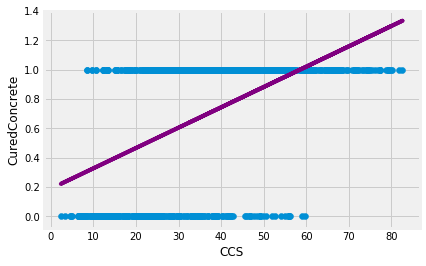

In [8]:
# Scatter plot that includes the regression line
plt.scatter(C.CCS, C.CuredConcrete)
plt.plot(C.CCS, C.CuredConcrete_pred, color='purple')
plt.xlabel('CCS')
plt.ylabel('CuredConcrete');

If CCS=70, what class do we predict for household? 1

If CCS=10, what class do we predict for household? 0

We predict the 0 class for lower values of CCS, and the 1 class for higher values of CCS. What's our cutoff value? Around CCS=40, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if CuredConcrete_pred >= 28, we predict a class of 1*, else we predict a class of *0.

Using this threshold, must create a new column of our predictions for whether a row is CuredConcrete.